## PREDICTING WIND TURBINE POWER OUTPUT FROM WIND SPEED VALUES 
## using LINEAR REGRESSION

#### Objectives
##### 1 Perform linear regression on the dataset.
##### 2 Explain what this shows.
##### 3 Predict wind speed power output from wind speed values.

#### SOURCES

In [1]:
# importing library and dataset.
import pandas as pd

dfpower = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

# examining what type is our data.
dfpower.dtypes


speed    float64
power    float64
dtype: object

In [2]:
# looking at the heads and ends of dataset.
print(dfpower)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


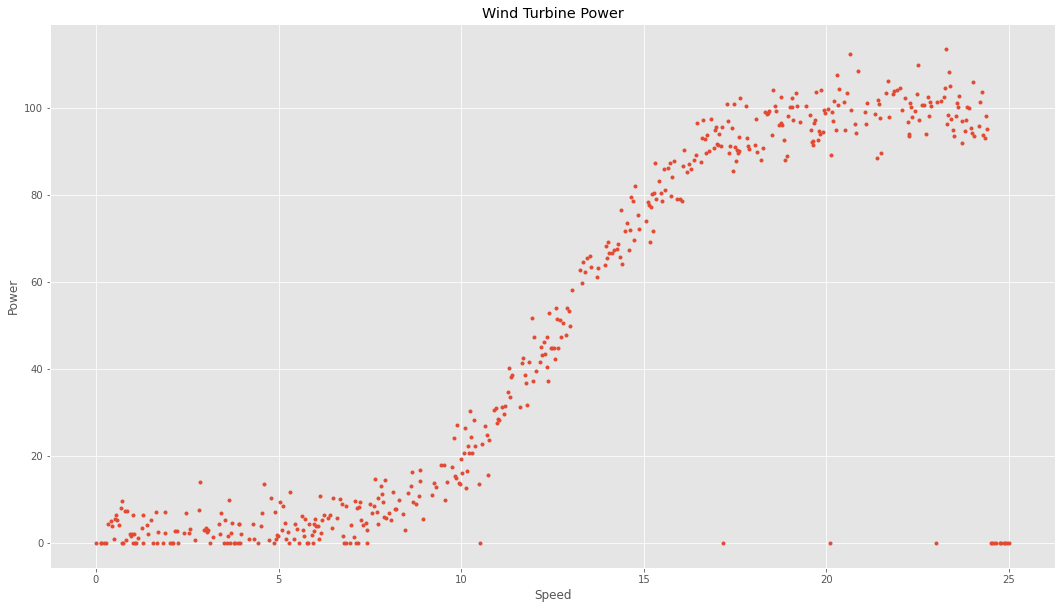

In [13]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# x = speed, y= power
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# plot each (x,y) dot on graph.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x, y, '.')